In [ ]:
 !wget https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip


--2023-05-17 08:49:43--  https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/michael-franke/npNLG/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip [following]
--2023-05-17 08:49:43--  https://raw.githubusercontent.com/michael-franke/npNLG/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31636302 (30M) [application/zip]
Saving to: ‘A3DS.zip’

A3DS.zip            100%[===================>]  30.17M   122MB/s    in 0.2s    

2023-05-17 08:49:44 (122 MB/s) - ‘A3DS.zip’ saved [3

In [ ]:
!unzip A3DS.zip

Archive:  A3DS.zip
   creating: A3DS/
  inflating: __MACOSX/._A3DS         
  inflating: A3DS/sandbox_3Dshapes_1000.pkl  
  inflating: __MACOSX/A3DS/._sandbox_3Dshapes_1000.pkl  
  inflating: A3DS/sandbox_3Dshapes_resnet50_features_1000.pt  
  inflating: __MACOSX/A3DS/._sandbox_3Dshapes_resnet50_features_1000.pt  
  inflating: A3DS/vocab.pkl          
  inflating: __MACOSX/A3DS/._vocab.pkl  
  inflating: A3DS/pretrained_decoder_3dshapes.pkl  
  inflating: __MACOSX/A3DS/._pretrained_decoder_3dshapes.pkl  
  inflating: A3DS/sandbox_IDs_3dshapes_1000.txt  
  inflating: __MACOSX/A3DS/._sandbox_IDs_3dshapes_1000.txt  


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.8 MB/s eta 0:00:00


In [2]:

from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel
from torch.utils.data import Dataset
from torchtext.data import get_tokenizer
import requests
import torch
import numpy as np
from PIL import Image
import pickle
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
model_raw = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [ ]:
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer       = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

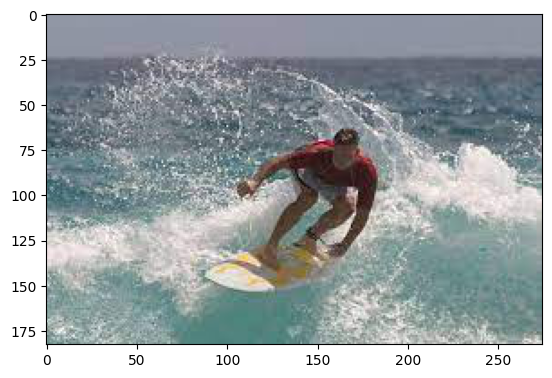

a man on a surfboard riding a wave 


In [3]:
from PIL import Image

def show_n_generate(image_path, greedy=True, model=model_raw):
    image = Image.open(image_path)
    pixel_values = image_processor(image, return_tensors="pt").pixel_values
    plt.imshow(np.asarray(image))
    plt.show()

    if greedy:
        generated_ids = model.generate(pixel_values, max_new_tokens=30)
    else:
        generated_ids = model.generate(
            pixel_values,
            do_sample=True,
            max_new_tokens=30,
            top_k=5)
    generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(generated_text)

image_path = "/content/download.jpeg"

show_n_generate(image_path, greedy=False)


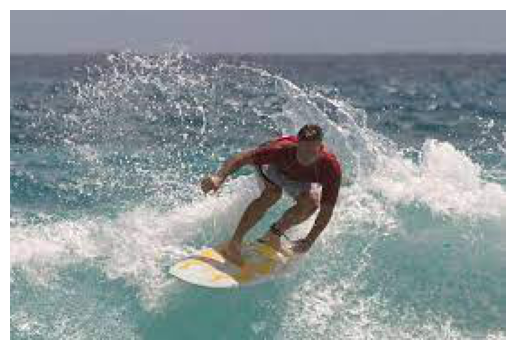

a man riding a wave on top of a surfboard 
---
a young man is surfing in the ocean water 
---
a man riding a wave on top of a surfboard 
---
a man rides a giant wave on top of a surfboard 
---
a man riding a wave on a surfboard 
---


In [7]:
def generate_captions(image_path, num_captions=5):
    image = Image.open(image_path)
    pixel_values = image_processor(image, return_tensors="pt").pixel_values

    plt.imshow(np.asarray(image))
    plt.axis('off')
    plt.show()

    generated_captions = []

    for _ in range(num_captions):
        generated_ids = model_raw.generate(pixel_values, max_new_tokens=30, do_sample=True)
        generated_caption = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
        generated_captions.append(generated_caption)

    for caption in generated_captions:
        print(caption)
        print('---')

image_path = "/content/download.jpeg"
generate_captions(image_path, num_captions=5)

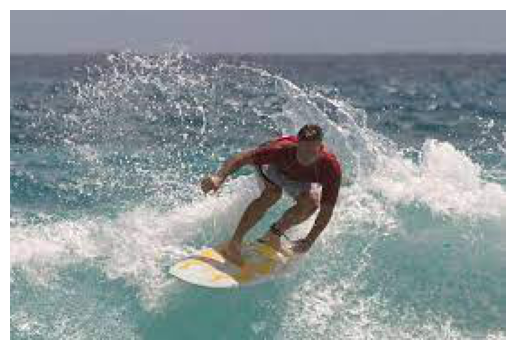

a person on a surfboard that is riding a wave 
---
a man is on a surfboard riding a wave 
---
a young man riding a surfboard through a wave on a white surfboard 
---
a man is jumping in the air on a surfboard 
---
a surfer riding a wave on a yellow board 
---


In [1]:
# #This line uses the wget command to download a zip file from the specified URL.
# !wget https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
# #This line unzips the downloaded zip file, extracting its contents.
# !unzip A3DS.zip
# #This line installs the transformers library using pip.
# !pip install transformers


#These lines import necessary libraries and modules required for the code.
from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel
from torch.utils.data import Dataset
from torchtext.data import get_tokenizer
import requests
import torch
import numpy as np
from PIL import Image
import pickle
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

#This line ignores warning messages
import warnings
warnings.filterwarnings('ignore')

#This line loads the pretrained VisionEncoderDecoderModel from the "nlpconnect/vit-gpt2-image-captioning" checkpoint.
model_raw = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

#This line loads the pretrained ViTImageProcessor from the "nlpconnect/vit-gpt2-image-captioning" checkpoint.
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

#This line loads the pretrained GPT2TokenizerFast from the "nlpconnect/vit-gpt2-image-captioning" checkpoint.
tokenizer       = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

#This line imports the Image class from the PIL (Python Imaging Library) module, which provides functionalities for working with images.
from PIL import Image



def generate_captions(image_path, num_captions=3):
    # Open the image using PIL library
    image = Image.open(image_path)

    # Preprocess the image using the image processor
    pixel_values = image_processor(image, return_tensors="pt").pixel_values

    # Display the image using matplotlib
    plt.imshow(np.asarray(image))
    plt.axis('off')
    plt.show()

    # Create an empty list to store the generated captions
    generated_captions = []

    # Generate the specified number of captions
    for _ in range(num_captions):
        # Generate caption IDs using the pre-trained model
        generated_ids = model_raw.generate(pixel_values, max_new_tokens=30, do_sample=True)
        
        # Decode the generated caption IDs into text
        generated_caption = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
        
        # Append the generated caption to the list
        generated_captions.append(generated_caption)

    # Print the generated captions
    for caption in generated_captions:
        print(caption)
        print('---')

# Path to the image file
image_path = "/content/download.jpeg"

# Call the generate_captions function with the specified number of captions
generate_captions(image_path, num_captions=5)



# New Section